#clustering

#Que -1

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


In [ ]:
import pandas as pd

In [ ]:
airline = pd.read_excel('EastWestAirlines.xlsx',sheet_name = 'data')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
airline.shape

(3999, 12)

In [ ]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
airline.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [ ]:
airline.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
airline.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

# CLUSTERING

Hiracal clustering:-

In [ ]:
#STEP 1 = Data Pre-processing:-

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
airline = pd.read_excel('EastWestAirlines.xlsx',sheet_name = 'data')
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
# Normalization function # use sklearn library norm
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [ ]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(airline.iloc[:,1:])

In [ ]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_3
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0.111111
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0.111111
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0.111111
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0.111111
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0.111111
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0.111111
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0.111111
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0.111111


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
std_scaler_1 = MinMaxScaler()
x_1 = pd.DataFrame(std_scaler_1.fit_transform(airline.iloc[:,1:]))
x_1

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [ ]:
#STEP 2 = Finding the optimal number of clusters using the Dendrogram :-

In [ ]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch

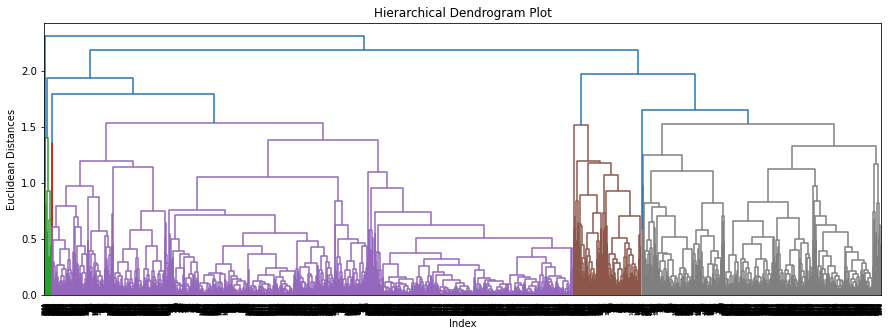

In [ ]:
#creating dendrogram:-
x = linkage(x_1, method = 'complete',metric = 'euclidean')

plt.figure(figsize = (15, 5))
plt.title('Hierarchical Dendrogram Plot')
plt.xlabel('Index')
plt.ylabel('Euclidean Distances')

sch.dendrogram(x)
plt.show()

In [ ]:
# Training the hierarchical clustering model :

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

In [ ]:
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'complete',affinity = "euclidean").fit(x_1) 
hc

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [ ]:
x_hc = hc.fit_predict(x_1)
x_hc

array([0, 0, 0, ..., 2, 0, 0])

In [ ]:
add_Clusters = pd.DataFrame(x_hc,columns = ['Clusters_1'])
add_Clusters.head()

,Clusters_1
0,0
1,0
2,0
3,0
4,1


In [ ]:
airline['clusters_1'] = add_Clusters
airline.head() 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_1
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [ ]:
#STEP 4 = Visualizing the clusters :

In [ ]:
airline[airline['clusters_1']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,1
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,1
16,17,51890,0,4,1,1,48963,16,0,0,6910,1,1
20,21,120576,0,5,1,1,58831,23,250,2,6896,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,3776,70178,0,5,1,1,61530,12,1300,6,3306,1,1
3772,3795,822321,0,5,1,1,138334,26,600,2,3288,1,1
3846,3869,97510,1678,5,1,1,71609,51,7650,26,1665,1,1
3855,3878,190730,0,5,1,1,78916,28,2450,9,1648,1,1


In [ ]:
airline[airline['clusters_1']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_1
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,2
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,2
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,2
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,2
18,19,91473,0,3,1,1,27408,17,0,0,6903,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,2
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,2
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2


In [ ]:
airline[airline['clusters_1']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_1
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,3
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1,3
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,3
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,3


# K - MEANS

In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
airline = pd.read_excel('EastWestAirlines.xlsx',sheet_name = 'data')
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler_2 = StandardScaler()
x_2 = std_scaler_2.fit_transform(airline.iloc[:,1:])
print(x_2)

[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
  -1.31754109e+00 -7.66919299e-01]]


In [ ]:
# Finding the optimal number of clusters using the Elbow Method :-

In [ ]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,random_state = 0)
    kmeans.fit(x_2)
    wcss.append(kmeans.inertia_)
wcss

[43989.000000000015,
 35409.511452424376,
 30899.24682465222,
 27446.372456681347,
 24541.329582045757,
 21089.973628929638,
 19165.86145865565,
 17316.866446128264,
 16043.406242309495,
 14726.983322766802]

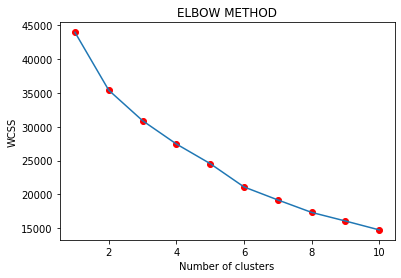

In [ ]:
plt.plot(range(1, 11), wcss)
plt.scatter(range(1, 11), wcss,color = 'red')
plt.title('ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Training the K - means clustering model :

In [ ]:
km = KMeans(6, random_state = 40)
km.fit(x_1)

KMeans(n_clusters=6, random_state=40)

In [ ]:
km.labels_

array([4, 4, 4, ..., 1, 0, 0], dtype=int32)

In [ ]:
airline['clusters_2'] = km.labels_
km.cluster_centers_

array([[ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
         7.17842978e-02,  6.90692719e-03,  1.13902296e-02,
         2.39980966e-01, -3.33066907e-16],
       [ 4.00536989e-02,  1.52189249e-02,  6.31853786e-01,
        -2.08166817e-17,  6.52741514e-04,  1.23136025e-01,
         2.17651345e-01,  1.82155063e-02,  3.21198089e-02,
         4.03697410e-01,  1.00000000e+00],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -3.33066907e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
  

In [ ]:
airline.groupby('clusters_2').agg(['mean']).reset_index()

,clusters_2,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,3204.917636,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0
1,1,2456.846753,68025.958442,168.779221,3.524675,1.000000,1.002597,32376.987013,18.688312,558.431169,1.693506,3364.901299,1.0
2,2,1840.462783,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0
3,3,1904.763744,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
4,4,1183.362903,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0
5,5,844.990544,144989.255319,225.238771,4.271868,1.002364,1.047281,57653.576832,21.579196,855.075650,2.550827,6227.356974,1.0


In [ ]:
# Visualizing the clusters :

In [ ]:
airline[airline['clusters_2']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_2
647,656,25835,0,3,1,1,15153,15,0,0,6142,1,1
759,769,43179,0,3,1,1,11915,6,0,0,6214,1,1
768,778,10978,0,3,1,1,14313,11,0,0,6193,1,1
803,813,66122,0,3,1,1,11756,13,0,0,5630,1,1
805,815,42044,2253,3,1,1,11433,10,0,0,6140,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3931,3954,49519,0,3,1,1,25762,18,0,0,1522,1,1
3954,3977,33972,0,3,1,1,21029,29,0,0,1467,1,1
3973,3996,72297,0,3,1,1,16241,16,0,0,1587,1,1
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,1


In [ ]:
airline[airline['clusters_2']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_2
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,2
30,31,177926,0,3,1,1,20797,13,0,0,7886,0,2
32,33,276571,0,4,1,1,42044,23,0,0,7872,0,2
44,45,121260,0,3,1,1,18493,18,0,0,7808,0,2
56,57,75971,0,4,1,1,34339,14,0,0,6869,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,3989,91605,0,4,1,1,37840,18,0,0,1444,0,2
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,2
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,2
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,2


In [ ]:
airline[airline['clusters_2']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_2
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,3
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,3
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,3
29,30,19221,0,1,1,1,4655,8,500,1,7896,1,3
36,37,23193,0,1,1,1,650,4,550,3,7861,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,4001,10071,0,2,1,1,27701,16,0,0,1421,1,3
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,3
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,3
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3


 DBSCAN:-

 #Data Pre-processing :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
airline = pd.read_excel('EastWestAirlines.xlsx',sheet_name = 'data')
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
df = pd.DataFrame(airline)
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [ ]:
df1 = df.drop(['cc1_miles', 'cc2_miles', 'cc3_miles','ID#','Award?'],axis = 1)
df1.head()


,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935


In [ ]:
 #Finding the optimal number of clusters using the DBSCAN :

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler_3 = StandardScaler().fit(df1)
x_3 = std_scaler_3.transform(df1)
x_3

array([[-4.51140783e-01, -1.86298687e-01, -7.02786266e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.01088399e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -5.39252702e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  3.43803696e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -6.89286154e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.09991847e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [ ]:
#Training the DBSCAN clustering model :

In [ ]:
db = DBSCAN(eps = 0.45,min_samples = 5)
db.fit(x_3)

DBSCAN(eps=0.45)

In [ ]:
db.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df2 = pd.DataFrame(db.labels_,columns = ['clusters_3'])
df2.head()

,clusters_3
0,0
1,0
2,0
3,0
4,-1


In [ ]:
airline['clusters_3'] = df2['clusters_3']
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_3
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1


In [ ]:
airline['clusters_3'] = df2['clusters_3']
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_3
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1


In [ ]:
df2.clusters_3.value_counts()

In [ ]:
airline.groupby(['clusters_3']).agg(['mean']).reset_index()

,clusters_3,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,1709.103279,141698.390164,472.388525,2.767213,1.013934,1.036066,33592.175410,18.470492,1372.644262,3.995082,4711.558197,0.601639
1,0,2141.523532,42575.058738,0.000000,1.739876,1.014958,1.001824,9778.432324,8.504196,56.954396,0.212696,3870.742795,0.267421
2,1,1931.800000,77792.400000,0.000000,3.800000,1.000000,1.000000,32710.400000,13.800000,510.000000,1.200000,4124.600000,0.600000
3,2,1591.500000,174606.000000,0.000000,4.750000,1.000000,1.000000,56291.000000,22.000000,0.000000,0.000000,4919.750000,0.500000
4,3,1759.333333,20466.333333,0.000000,1.000000,1.000000,1.000000,966.666667,5.333333,966.666667,5.333333,4524.000000,0.666667
5,4,2406.800000,200722.200000,0.000000,4.000000,1.000000,1.000000,42755.600000,19.400000,0.000000,0.000000,3474.000000,0.000000
6,5,3083.428571,129873.142857,0.000000,1.000000,1.000000,1.000000,2657.142857,3.142857,485.714286,1.857143,1932.857143,0.571429
7,6,3334.000000,175683.800000,0.000000,1.000000,1.000000,1.000000,7961.800000,4.000000,0.000000,0.000000,1987.200000,0.600000
8,7,2820.666667,176415.666667,0.000000,1.000000,1.000000,1.000000,5481.333333,5.666667,58.333333,0.333333,3128.333333,0.000000


In [ ]:
#Visualizing the clusters :

In [ ]:
airline[airline['clusters_3']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_3
1636,1652,31230,0,1,1,1,815,5,815,5,4931,0,3
1794,1811,17609,0,1,1,1,803,5,803,5,4317,1,3
1798,1815,12560,0,1,1,1,1282,6,1282,6,4324,1,3


In [ ]:
airline[airline['clusters_3']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_3
1441,1455,161321,0,5,1,1,59645,21,0,0,5147,0,2
1525,1540,156219,0,5,1,1,55874,24,0,0,5015,1,2
1619,1634,196079,0,5,1,1,56890,21,0,0,4791,0,2
1721,1737,184805,0,4,1,1,52755,22,0,0,4726,1,2


In [ ]:
airline[airline['clusters_3']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_3
1519,1534,71930,0,4,1,1,32774,13,500,1,4300,1,1
1800,1817,86143,0,3,1,1,29652,11,500,1,4317,1,1
1817,1834,75112,0,4,1,1,35532,14,500,1,4271,0,1
2123,2140,75505,0,4,1,1,30850,17,500,1,4007,0,1
2316,2334,80272,0,4,1,1,34744,14,550,2,3728,1,1


#Que - 2

#Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


Data Set : crime_data

In [ ]:
#Import Necessary libraries

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
crime_cases = pd.read_csv('crime_data.csv')
crime_cases

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
#Data Understanding

In [ ]:
crime_cases.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
crime_cases.shape

(50, 5)

In [ ]:
crime_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
crime_cases.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [ ]:
crime_cases.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
crime_cases.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [ ]:
# CLUSTERING

In [ ]:
# HIERARCHICAL CLUSTERING

In [ ]:
 #Data Pre-processing :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
crime_cases = pd.read_csv('crime_data.csv')
crime_cases.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
std_scaler_1 = MinMaxScaler()
x_1 = pd.DataFrame(std_scaler_1.fit_transform(crime_cases.iloc[:,1:]))
x_1

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [ ]:
# Finding the optimal number of clusters using the Dendrogram :

In [ ]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch

For creating dendrogram ::: p = np.array(df_norm) and converting into numpy array format

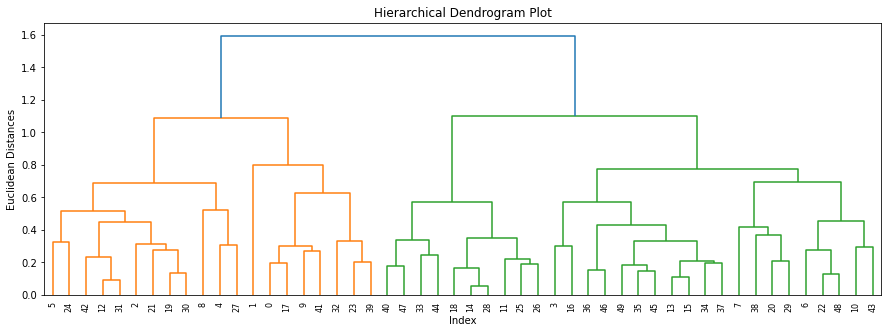

In [ ]:
# create dendrogram
x = linkage(x_1, method = 'complete',metric = 'euclidean')

plt.figure(figsize = (15, 5))
plt.title('Hierarchical Dendrogram Plot')
plt.xlabel('Index')
plt.ylabel('Euclidean Distances')

sch.dendrogram(x)
plt.show()

In [ ]:
#Training the hierarchical clustering model :

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

In [ ]:
hc = AgglomerativeClustering(n_clusters = 7, linkage = 'complete',affinity = "euclidean").fit(x_1) 
hc

AgglomerativeClustering(linkage='complete', n_clusters=7)

In [ ]:
x_hc = hc.fit_predict(x_1)
x_hc

array([1, 4, 0, 5, 0, 0, 3, 6, 0, 1, 3, 2, 0, 5, 2, 5, 5, 1, 2, 0, 6, 0,
       3, 1, 0, 2, 2, 0, 2, 6, 0, 0, 1, 2, 5, 5, 5, 5, 6, 1, 2, 1, 0, 3,
       2, 5, 5, 2, 3, 5])

In [ ]:
add_Clusters = pd.DataFrame(x_hc,columns = ['Clusters_1'])
add_Clusters.head()

,Clusters_1
0,1
1,4
2,0
3,5
4,0


In [ ]:
crime_cases['clusters_1'] = add_Clusters
crime_cases.head() 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters_1
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,5
4,California,9.0,276,91,40.6,0


In [ ]:
#Visualizing the clusters :

In [ ]:
crime_cases[crime_cases['clusters_1']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters_1
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
44,Vermont,2.2,48,32,11.2,2
47,West Virginia,5.7,81,39,9.3,2


In [ ]:
crime_cases[crime_cases['clusters_1']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters_1
0,Alabama,13.2,236,58,21.2,1
9,Georgia,17.4,211,60,25.8,1
17,Louisiana,15.4,249,66,22.2,1
23,Mississippi,16.1,259,44,17.1,1
32,North Carolina,13.0,337,45,16.1,1
39,South Carolina,14.4,279,48,22.5,1
41,Tennessee,13.2,188,59,26.9,1


In [ ]:
crime_cases[crime_cases['clusters_1']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters_1
2,Arizona,8.1,294,80,31.0,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
8,Florida,15.4,335,80,31.9,0
12,Illinois,10.4,249,83,24.0,0
19,Maryland,11.3,300,67,27.8,0
21,Michigan,12.1,255,74,35.1,0
24,Missouri,9.0,178,70,28.2,0
27,Nevada,12.2,252,81,46.0,0
30,New Mexico,11.4,285,70,32.1,0


# K - MEANS

In [ ]:
 #Data Pre-processing :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
crime_cases = pd.read_csv('crime_data.csv')
crime_cases.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler_2 = StandardScaler()
x_2 = std_scaler_2.fit_transform(crime_cases.iloc[:,1:])
print(x_2)

[[ 1.25517927  0.79078716 -0.52619514 -0.00345116]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]
 [ 0.07236067  1.49381682  1.00912225  1.05346626]
 [ 0.23470832  0.23321191 -1.08449238 -0.18679398]
 [ 0.28109336  1.2756352   1.77678094  2.08881393]
 [ 0.02597562  0.40290872  0.86954794  1.88390137]
 [-1.04088037 -0.73648418  0.79976079 -1.09272319]
 [-0.43787481  0.81502956  0.45082502 -0.58583422]
 [ 1.76541475  1.99078607  1.00912225  1.1505301 ]
 [ 2.22926518  0.48775713 -0.38662083  0.49265293]
 [-0.57702994 -1.51224105  1.21848371 -0.11129987]
 [-1.20322802 -0.61527217 -0.80534376 -0.75839217]
 [ 0.60578867  0.94836277  1.21848371  0.29852525]
 [-0.13637203 -0.70012057 -0.03768506 -0.0250209 ]
 [-1.29599811 -1.39102904 -0.5959823  -1.07115345]
 [-0.41468229 -0.67587817  0.03210209 -0.34856705]
 [ 0.44344101 -0.74860538 -0.94491807 -0.53190987]
 [ 1.76541475  0.94836277  0.03210209  0.10439756]
 [-1.31919063 -1.06375661 -1.01470522 -1.44862395]
 [ 0.81452136  1.56654403  0.10

In [ ]:
# Finding the optimal number of clusters using the Elbow Method :

In [ ]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,random_state = 0)
    kmeans.fit(x_2)
    wcss.append(kmeans.inertia_)
wcss

[200.00000000000003,
 104.96163315756871,
 80.0888613219962,
 57.55425863091105,
 50.52026552535068,
 43.927464044975736,
 40.52183461131976,
 34.68738839784909,
 32.70648136388185,
 28.311639397122548]

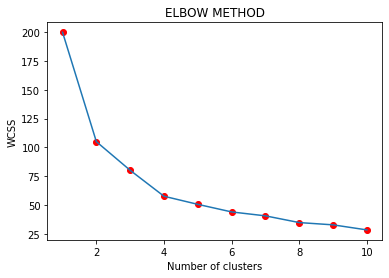

In [ ]:
plt.plot(range(1, 11), wcss)
plt.scatter(range(1, 11), wcss,color = 'red')
plt.title('ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Training the K - means clustering model :

In [ ]:
km = KMeans(4, random_state = 60)
km.fit(x_1)

KMeans(n_clusters=4, random_state=60)

In [ ]:
km.labels_

array([2, 3, 3, 2, 3, 3, 0, 0, 3, 2, 0, 1, 3, 0, 1, 0, 1, 2, 1, 3, 0, 3,
       1, 2, 0, 1, 1, 3, 1, 0, 3, 3, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 3, 0,
       1, 0, 0, 1, 1, 0], dtype=int32)

In [ ]:
crime_cases['clusters_2'] = km.labels_
km.cluster_centers_

array([[0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189]])

In [ ]:
crime_cases.groupby('clusters_2').agg(['mean']).reset_index()

,clusters_2,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.852941,141.176471,73.647059,19.335294
1,1,3.600000,78.538462,52.076923,12.176923
2,2,13.937500,243.625000,53.750000,21.412500
3,3,10.966667,264.000000,76.500000,33.608333


In [ ]:
#Visualizing the clusters :

In [ ]:
crime_cases[crime_cases['clusters_2']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters_2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
24,Missouri,9.0,178,70,28.2,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0


In [ ]:
crime_cases[crime_cases['clusters_2']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters_2
11,Idaho,2.6,120,54,14.2,1
14,Iowa,2.2,56,57,11.3,1
16,Kentucky,9.7,109,52,16.3,1
18,Maine,2.1,83,51,7.8,1
22,Minnesota,2.7,72,66,14.9,1
25,Montana,6.0,109,53,16.4,1
26,Nebraska,4.3,102,62,16.5,1
28,New Hampshire,2.1,57,56,9.5,1
33,North Dakota,0.8,45,44,7.3,1
40,South Dakota,3.8,86,45,12.8,1


In [ ]:
crime_cases[crime_cases['clusters_2']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters_2
0,Alabama,13.2,236,58,21.2,2
3,Arkansas,8.8,190,50,19.5,2
9,Georgia,17.4,211,60,25.8,2
17,Louisiana,15.4,249,66,22.2,2
23,Mississippi,16.1,259,44,17.1,2
32,North Carolina,13.0,337,45,16.1,2
39,South Carolina,14.4,279,48,22.5,2
41,Tennessee,13.2,188,59,26.9,2


In [ ]:
#DBSCAN

In [ ]:
# Data Pre-processing :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
crime_cases = pd.read_csv('crime_data.csv')
crime_cases.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
df = pd.DataFrame(crime_cases)
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
df.columns

In [ ]:
df1 = df.drop(['Unnamed: 0'],axis = 1)
df1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [ ]:
#Finding the optimal number of clusters using the DBSCAN :

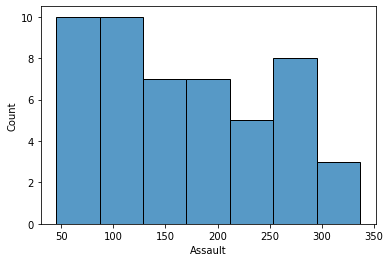

In [ ]:
sns.histplot(crime_cases.Assault)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler_3 = StandardScaler().fit(df1)
x_3 = std_scaler_3.transform(df1)
x_3

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
#Training the DBSCAN clustering model :

In [ ]:
db = DBSCAN(eps = 1.1,min_samples = 3)
db.fit(x_3)

DBSCAN(eps=1.1, min_samples=3)

In [ ]:
db.labels_

array([ 0, -1,  1,  2, -1, -1,  2, -1, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2,  0,  2,  2,  2, -1,  2,  2,  1,  1,  0,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  1,  2,  2,  2,  2,  2,  2,  2])

In [ ]:
df2 = pd.DataFrame(db.labels_,columns = ['clusters_3'])
df2.head()

,clusters_3
0,0
1,-1
2,1
3,2
4,-1


In [ ]:
crime_cases['clusters_3'] = df2['clusters_3']
crime_cases.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters_3
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1


In [ ]:
df2.clusters_3.value_counts()

 2    30
 0     7
 1     7
-1     6
Name: clusters_3, dtype: int64

In [ ]:
crime_cases.groupby(['clusters_3']).agg(['mean']).reset_index()

,clusters_3,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,10.066667,261.333333,75.000000,36.250000
1,0,14.671429,251.285714,54.285714,21.685714
2,1,11.014286,262.571429,77.142857,28.800000
3,2,4.973333,112.433333,63.566667,16.356667


In [ ]:
# Visualizing the clusters :

In [ ]:
crime_cases[crime_cases['clusters_3']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters_3
0,Alabama,13.2,236,58,21.2,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [ ]:
crime_cases[crime_cases['clusters_3']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters_3
2,Arizona,8.1,294,80,31.0,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
30,New Mexico,11.4,285,70,32.1,1
31,New York,11.1,254,86,26.1,1
42,Texas,12.7,201,80,25.5,1


In [ ]:
crime_cases[crime_cases['clusters_3']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters_3
3,Arkansas,8.8,190,50,19.5,2
6,Connecticut,3.3,110,77,11.1,2
10,Hawaii,5.3,46,83,20.2,2
11,Idaho,2.6,120,54,14.2,2
13,Indiana,7.2,113,65,21.0,2
14,Iowa,2.2,56,57,11.3,2
15,Kansas,6.0,115,66,18.0,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2
20,Massachusetts,4.4,149,85,16.3,2
